In [28]:
!pip install beautifulsoup --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-atd97bwn/beautifulsoup_dad29113601241cb84ed085741af299f/setup.py", line 3
          "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                         ^^
      SyntaxError: invalid syntax
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encounte

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


In [52]:


df = pd.read_csv("diabetes.csv")

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

<Axes: xlabel='Age'>

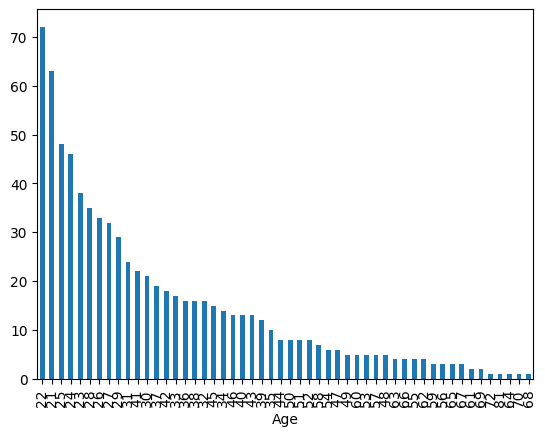

In [21]:
df['Age'].value_counts().plot.bar()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


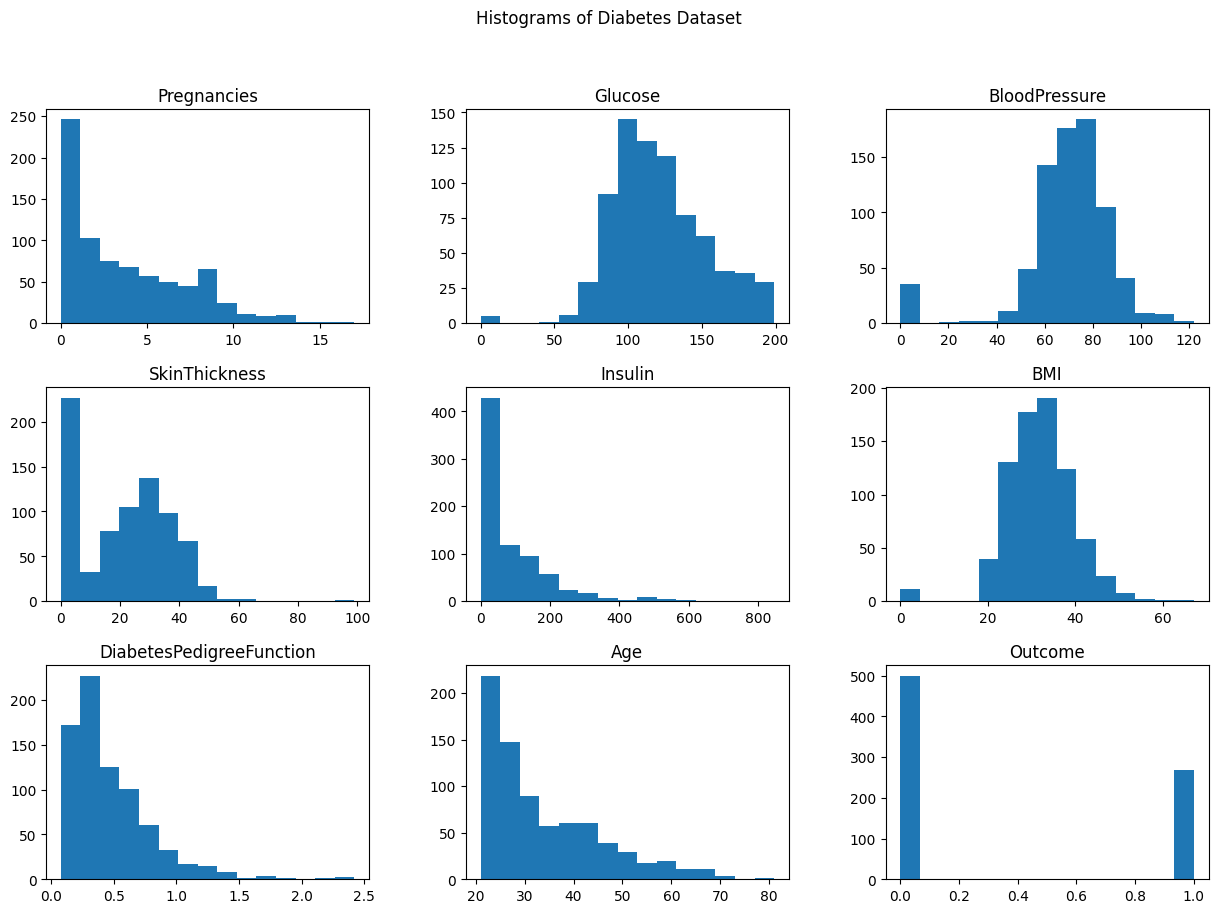

In [11]:
df.hist(bins=15, figsize=(15, 10), grid=False)
plt.suptitle('Histograms of Diabetes Dataset')
plt.show()

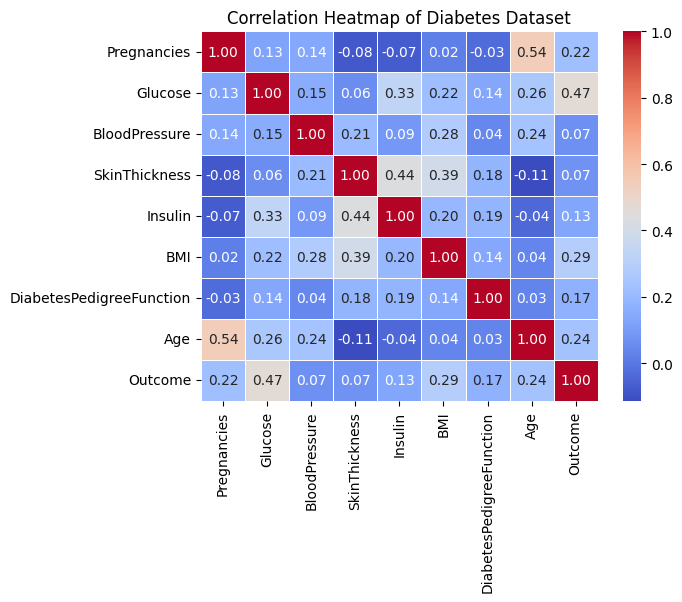

In [54]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

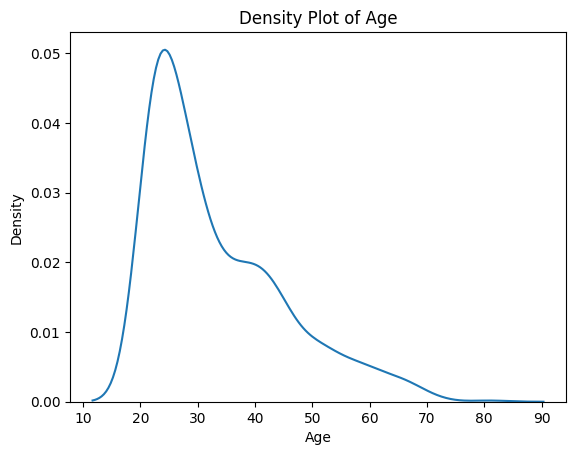

In [22]:

sns.kdeplot(df['Age'])
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [15]:
print("The median : \n" , df.median())

The median : 
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


In [55]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [16]:
print("The mode : \n" , df.mode())

The mode : 
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0       99           70.0            0.0      0.0  32.0   
1          NaN      100            NaN            NaN      NaN   NaN   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.254  22.0      0.0  
1                     0.258   NaN      NaN  


In [17]:
print("The standard deviation : \n" , df.std())

The standard deviation : 
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


In [25]:
df1 = pd.read_csv('diabetes.txt', sep='\t')

df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:

url = 'http://books.toscrape.com/'


response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')


books = soup.find_all('article', {'class': 'product_pod'})


titles = []
prices = []
ratings = []


for book in books:
 
    title = book.find('h3').find('a')['title']
    

    price = book.find('p', {'class': 'price_color'}).text
 
    rating = book.find('p', {'class': 'star-rating'})['class'][1]

    titles.append(title)
    prices.append(price)
    ratings.append(rating)

df = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Rating': ratings
})

print(df.head(10))

                                               Title   Price Rating
0                               A Light in the Attic  £51.77  Three
1                                 Tipping the Velvet  £53.74    One
2                                         Soumission  £50.10    One
3                                      Sharp Objects  £47.82   Four
4              Sapiens: A Brief History of Humankind  £54.23   Five
5                                    The Requiem Red  £22.65    One
6  The Dirty Little Secrets of Getting Your Dream...  £33.34   Four
7  The Coming Woman: A Novel Based on the Life of...  £17.93  Three
8  The Boys in the Boat: Nine Americans and Their...  £22.60   Four
9                                    The Black Maria  £52.15    One


In [43]:
df2 =  pd.read_csv("Crop_recommendation.csv")

df2.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [44]:
df2.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [45]:
df2.median()

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64

In [46]:
df2.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [47]:
df2.mode()

,N,P,K,temperature,humidity,ph,rainfall
0,22.0,60.0,17.0,8.825675,14.258040,3.504752,20.211267
1,40.0,NaN,NaN,9.467960,14.273280,3.510404,20.360011
2,NaN,NaN,NaN,9.535586,14.280419,3.525366,20.390205
3,NaN,NaN,NaN,9.724458,14.323138,3.532009,20.490356
4,NaN,NaN,NaN,9.851243,14.338474,3.558823,20.661278
...,...,...,...,...,...,...,...
2195,NaN,NaN,NaN,43.037143,99.658092,9.416003,291.298662
2196,NaN,NaN,NaN,43.080227,99.724010,9.459493,295.609449
2197,NaN,NaN,NaN,43.302049,99.846716,9.679241,295.924880
2198,NaN,NaN,NaN,43.360515,99.969060,9.926212,298.401847


In [48]:
df2.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [49]:
df2.var()

N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64